In [1]:
%matplotlib inline
import pandas as pd
import librosa as lib
import librosa.display
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import Audio
import scipy
import pyarrow.feather as feather


In [2]:
#Import music dataframe
music = feather.read_feather('music_df')

In [3]:
#import motion dataframe of only participant 1
motion1 = feather.read_feather('Participant_Motion/PID_motion_1')

In [4]:
#import demographic information dataframe, includes all participants, but we will only use partiicpant 1 info for now
demos = feather.read_feather('demos_df')

Reminder of what each look like

In [5]:
music.head()

,C,C_sharp,D,D_sharp,E,F,F_sharp,G,G_sharp,A,A_sharp,B
0,0.391866,0.271475,0.543743,0.414470,0.615711,0.905505,0.693868,1.0,0.873349,0.428765,0.196232,0.178688
1,0.391006,0.270759,0.542460,0.419167,0.611465,0.895052,0.696120,1.0,0.865096,0.424725,0.202718,0.177431
2,0.384290,0.269616,0.530845,0.424728,0.596871,0.879191,0.701280,1.0,0.854621,0.410783,0.205452,0.178596
3,0.368410,0.266402,0.511752,0.433351,0.582881,0.878751,0.706602,1.0,0.850467,0.397394,0.211017,0.174648
4,0.356740,0.260931,0.492235,0.435323,0.570510,0.877007,0.707534,1.0,0.849687,0.381047,0.214705,0.177209


In [6]:
motion1.head()

,X,Y,Z,PID
0,159.596,1845.594,1732.156,1
1,159.583,1845.451,1732.144,1
2,159.584,1845.308,1732.126,1
3,159.587,1845.180,1732.105,1
4,159.597,1845.072,1732.103,1


In [7]:
demos.head()

,Group,Subject,Age,Sex,Height,Listen,Produce,Dance,Exercise,Tiresome,Exper_silent,Exper_music,Eyes,Knees,Mean QoM,Mean QoM w/oM,Mean QoM w M,NoMus-Mus Diff,PID
0,A,1,23,M,1.72,5,30.0,1.0,7.0,3,3.0,2,1.0,1.0,8.271082,7.955534,8.586613,0.631079,1
1,A,2,24,M,1.67,10,10.0,2.0,10.0,1,2.0,2,1.0,1.0,11.224096,10.627763,11.820396,1.192633,2
2,A,3,27,F,1.63,14,1.0,4.0,3.0,4,3.0,4,0.0,0.5,6.441350,6.063694,6.818985,0.755291,3
3,A,4,27,M,1.75,5,20.0,2.0,2.0,4,5.0,3,1.0,1.0,5.216179,5.289182,5.143181,-0.146001,4
4,A,9,24,F,1.64,15,0.0,2.0,6.0,2,2.0,1,1.0,1.0,5.151870,4.940202,5.363525,0.423323,5


### Music EDA

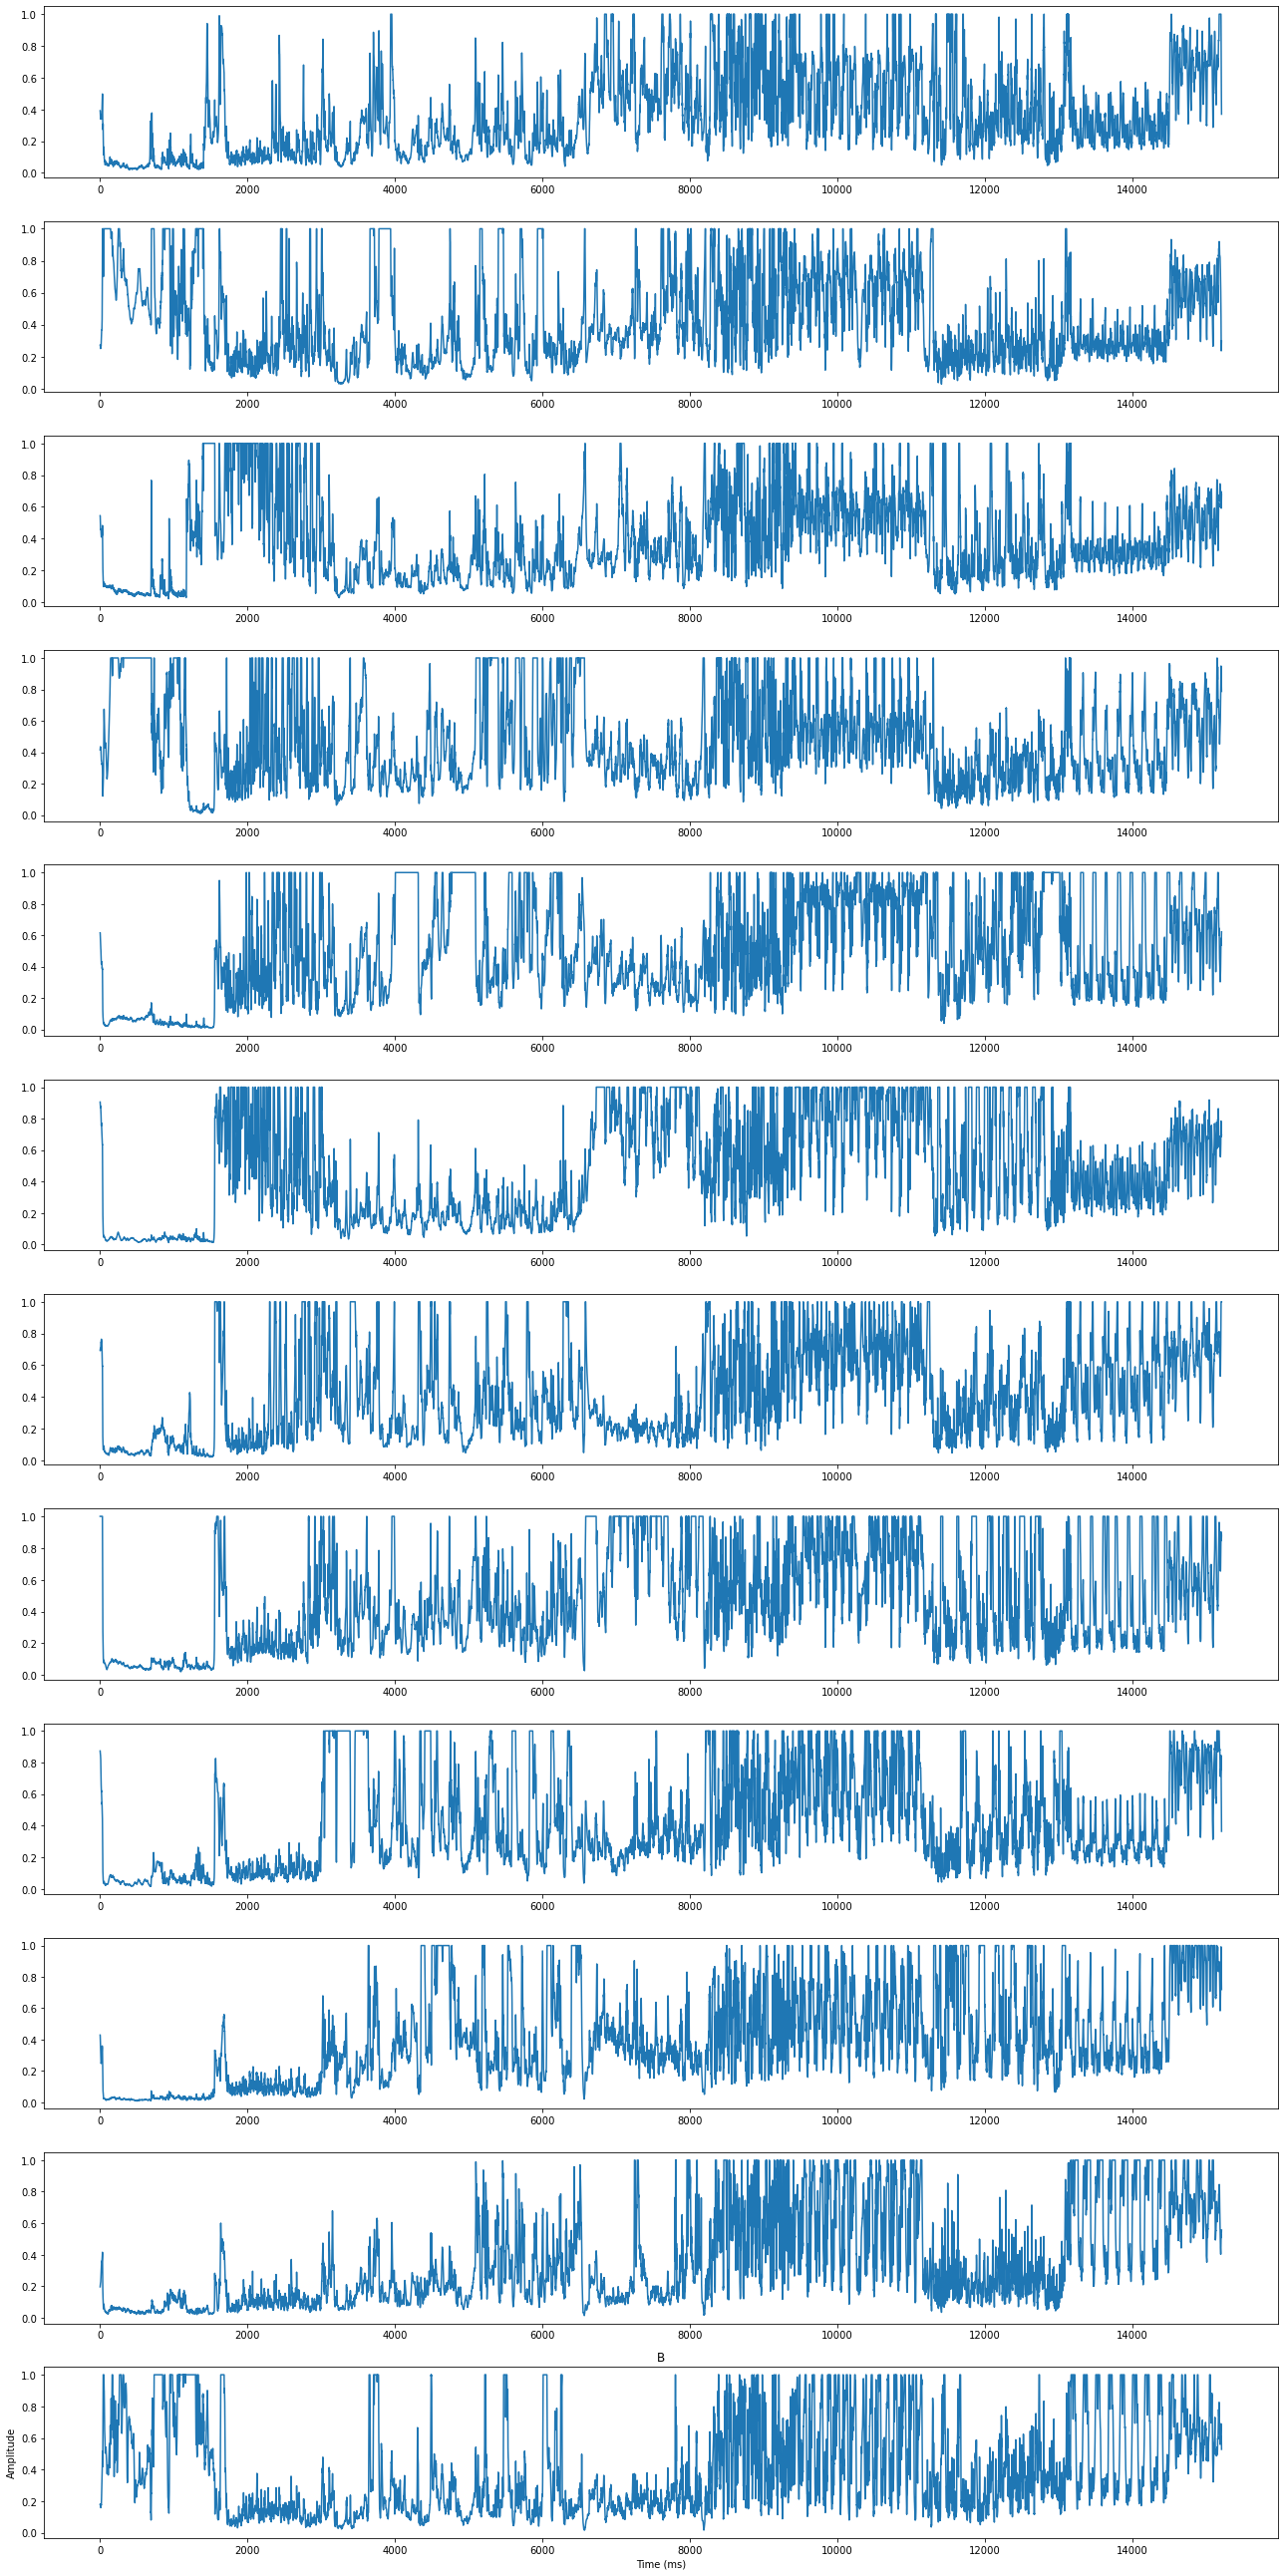

In [8]:
#Visualizing each note for full 3 minutes
fig, axes = plt.subplots(12, 1, figsize=(18, 36))
for axs in range(0,12):
    music.iloc[:,axs].plot(ax=axes[axs])
    plt.xlabel('Time (ms)')
    plt.ylabel('Amplitude')
    plt.title(music.columns[axs])
plt.tight_layout()
plt.show()

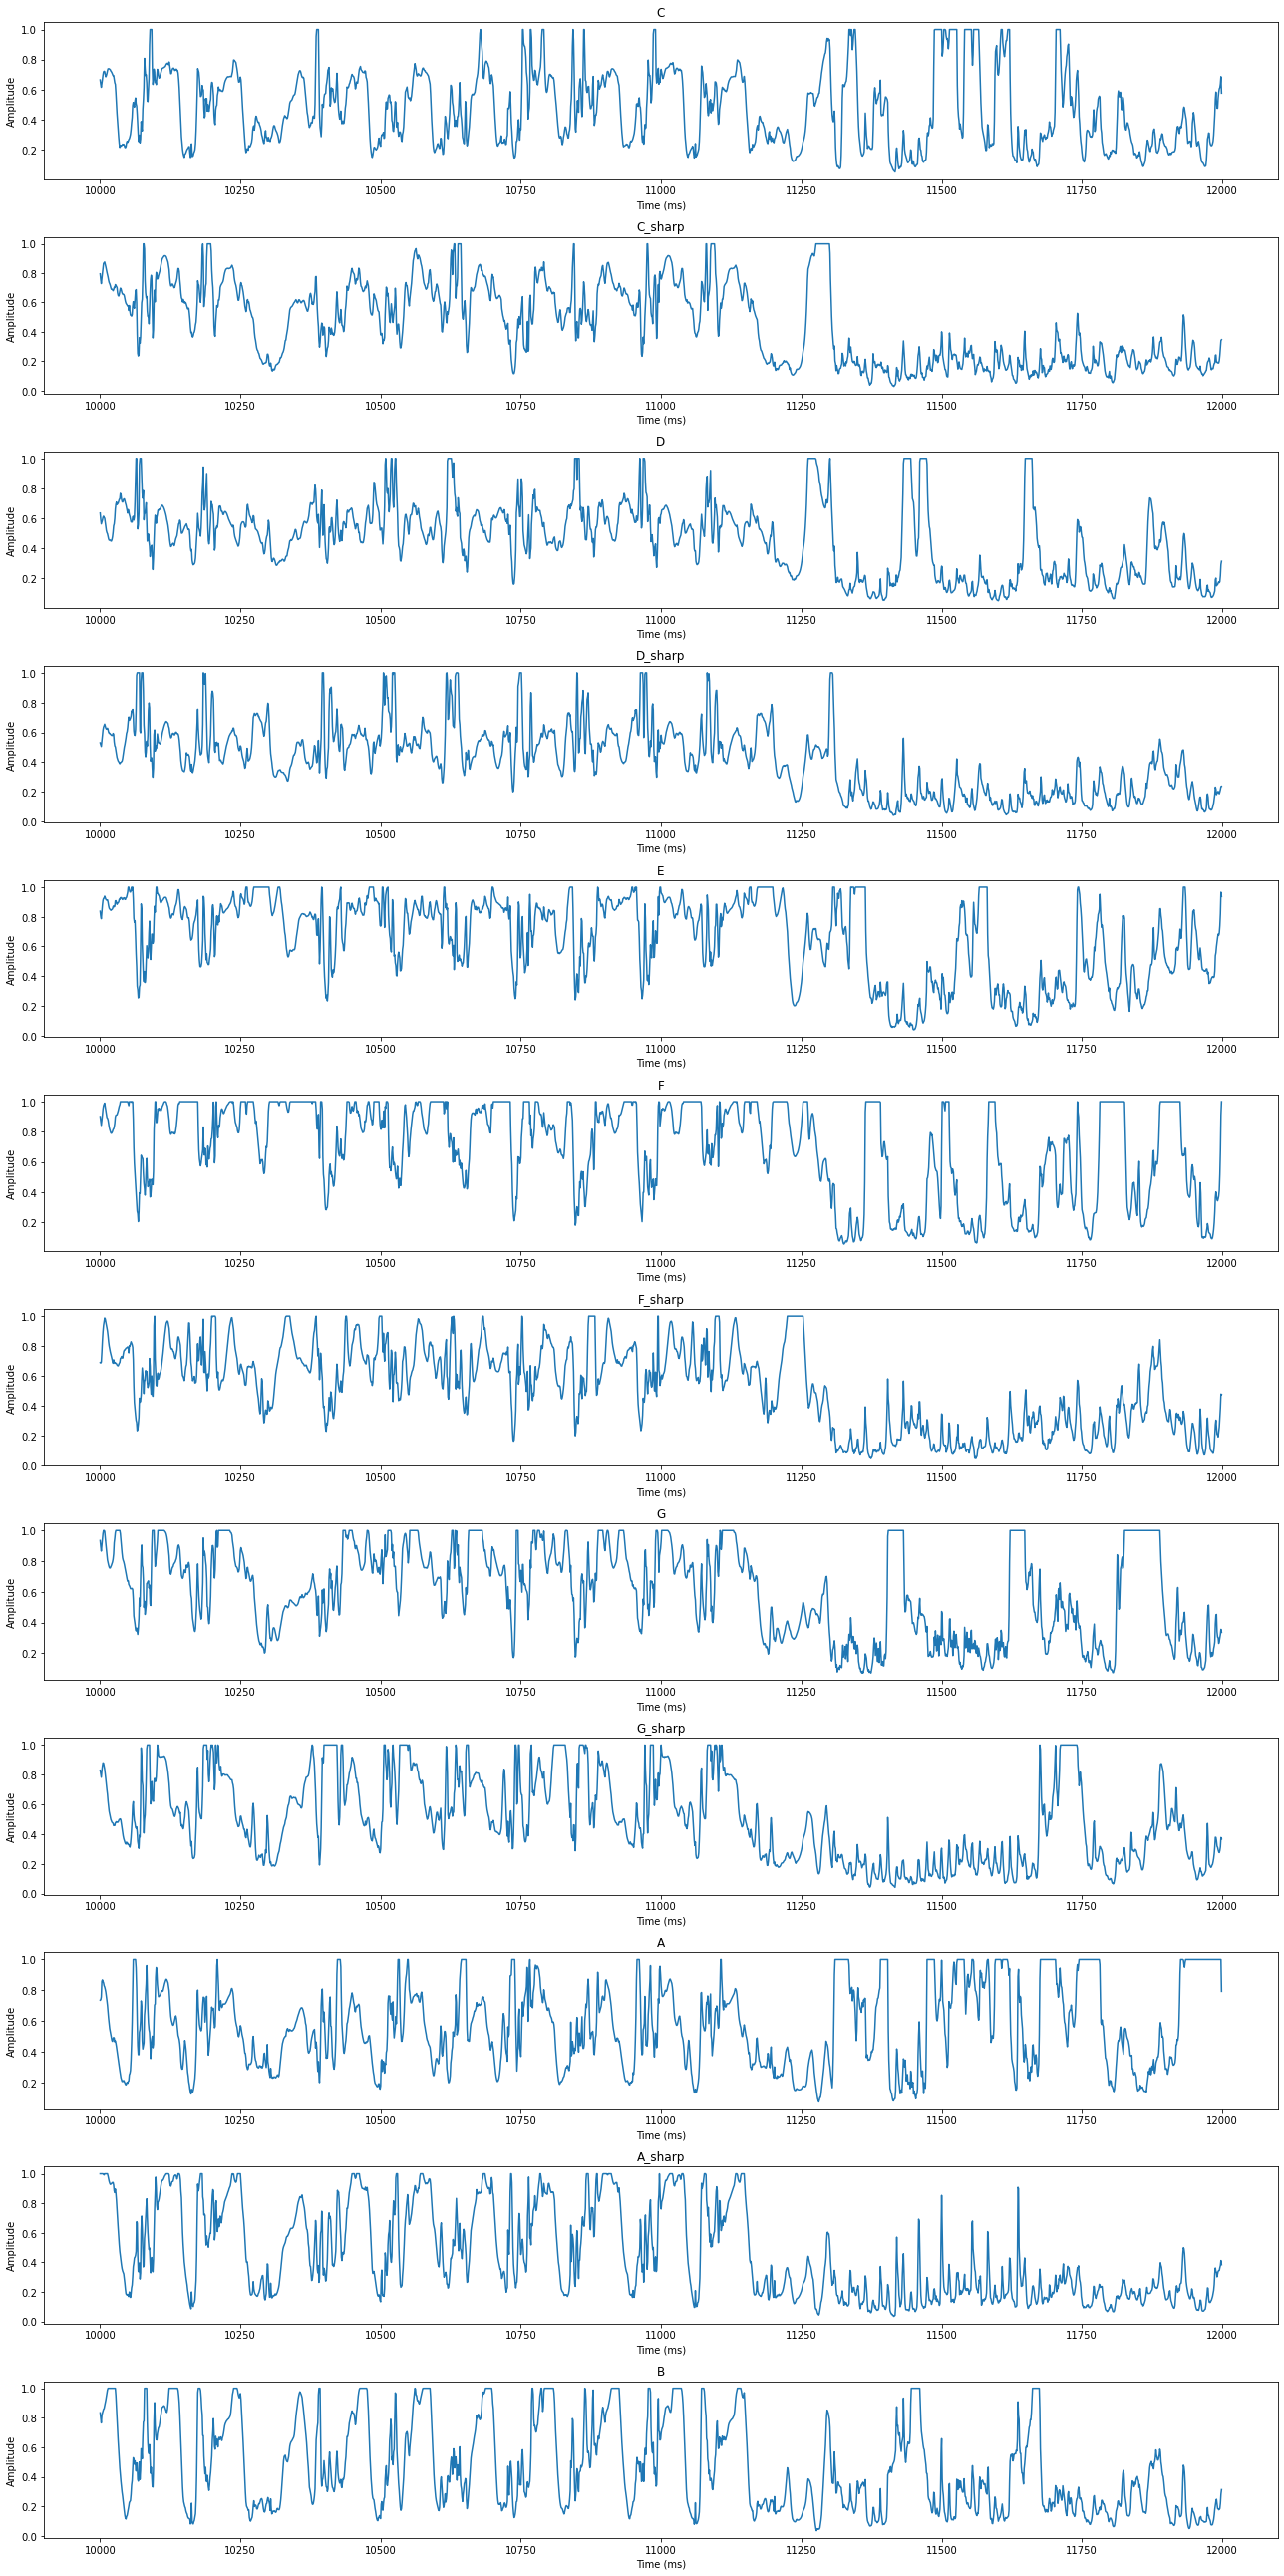

In [9]:
#Zooming into some busier sections to see the differences more clearly
fig, axes = plt.subplots(12, 1, figsize=(18, 36))
for axs in range(0,12):
    music.iloc[10000:12000,axs].plot(ax=axes[axs])
    axes[axs].set_xlabel('Time (ms)')
    axes[axs].set_ylabel('Amplitude')
    axes[axs].set_title(music.columns[axs])
plt.tight_layout()
plt.show()

In [10]:
music.describe()

,C,C_sharp,D,D_sharp,E,F,F_sharp,G,G_sharp,A,A_sharp,B
count,15216.000000,15216.000000,15216.000000,15216.000000,15216.000000,15216.000000,15216.000000,15216.000000,15216.000000,15216.000000,15216.000000,15216.000000
mean,0.355950,0.422432,0.388188,0.460801,0.494960,0.471589,0.399323,0.471159,0.410805,0.402099,0.350489,0.394584
std,0.254600,0.268793,0.264895,0.277641,0.310636,0.328591,0.279171,0.310778,0.298267,0.297255,0.294059,0.295773
min,0.021398,0.027630,0.020229,0.010507,0.009348,0.012805,0.020542,0.021034,0.015816,0.008196,0.014128,0.016334
25%,0.154171,0.210024,0.186118,0.240680,0.244267,0.182540,0.166658,0.211641,0.177104,0.170773,0.117388,0.160677
50%,0.288809,0.339509,0.315681,0.389827,0.437326,0.405418,0.325364,0.401182,0.321185,0.333330,0.237105,0.287121
75%,0.521340,0.604895,0.549157,0.625001,0.775162,0.761341,0.608919,0.721626,0.610875,0.591950,0.532748,0.584161
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [11]:
# to match with cleaned motion data we need to drop group P and participant 56
demos = demos.loc[demos['Group'] != 'P']
demos['Group'].unique()

array(['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H'], dtype=object)

In [12]:
demos = demos.loc[demos['PID']!=56]
demos.shape

(73, 19)

This matches with our useable motion data, participants numbered 1-74 with no number 56.

### Demograhpic EDA

In [13]:
demos_clean = demos.drop(columns=['Group', 'Subject', 'Exper_silent', 'Exper_music', 'Eyes',
       'Knees', 'Mean QoM', 'Mean QoM w/oM', 'Mean QoM w M', 'NoMus-Mus Diff'])

In [14]:
demos_clean['Sex'].replace({'M':0, 'F':1}, inplace=True)
demos_clean

,Age,Sex,Height,Listen,Produce,Dance,Exercise,Tiresome,PID
0,23,0.0,1.72,5,30.0,1.0,7.0,3,1
1,24,0.0,1.67,10,10.0,2.0,10.0,1,2
2,27,1.0,1.63,14,1.0,4.0,3.0,4,3
3,27,0.0,1.75,5,20.0,2.0,2.0,4,4
4,24,1.0,1.64,15,0.0,2.0,6.0,2,5
...,...,...,...,...,...,...,...,...,...
69,26,0.0,1.72,8,10.0,1.0,4.0,1,70
70,24,0.0,1.71,12,10.0,2.0,7.0,1,71
71,65,1.0,1.73,4,0.0,2.0,2.0,2,72
72,45,1.0,1.67,5,0.0,0.0,3.0,1,73


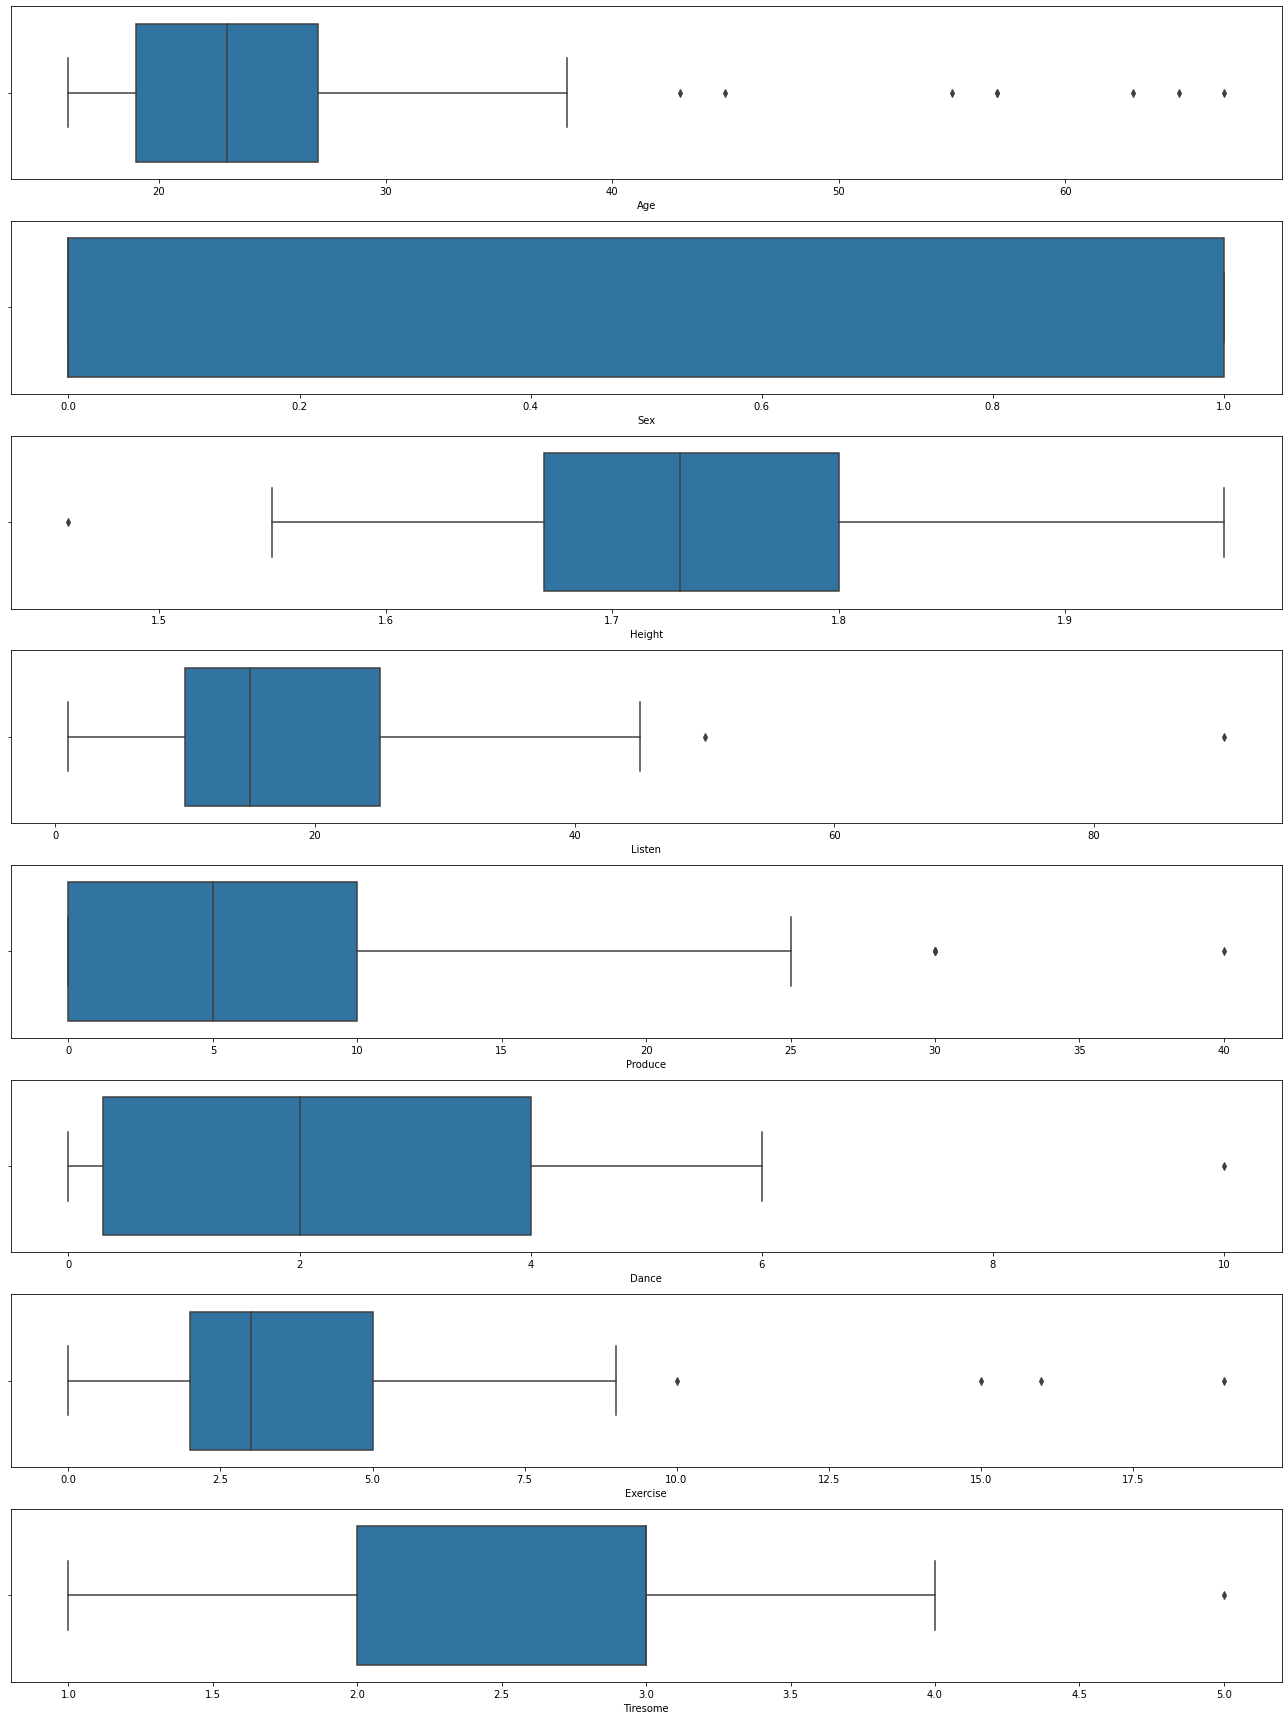

In [15]:
columns = list(demos_clean.columns)
fig, axes = plt.subplots(8, 1, figsize=(18, 24))
for i in range(0,8):
    sns.boxplot(x=demos_clean.iloc[:,i], data=demos_clean, orient='h', ax=axes[i])
    axes[i].set_xlabel(demos_clean.columns[i])
plt.tight_layout()
plt.show()

In [16]:
motion1.describe()

,X,Y,Z,PID
count,36001.000000,36001.000000,36001.000000,36001.0
mean,160.456958,1860.184987,1724.088614,1.0
std,4.317600,11.164595,6.404407,0.0
min,144.325000,1829.400000,1715.278000,1.0
25%,158.102000,1852.813000,1718.380000,1.0
50%,161.018000,1859.077000,1721.902000,1.0
75%,163.689000,1866.659000,1732.118000,1.0
max,170.325000,1901.478000,1733.874000,1.0


In [17]:
#set the music dataframe index to a time series and upsamplt to match the 100 readings per second from the motion data
music.set_index(pd.timedelta_range(start='180 S', end='356 S', periods=15216), inplace=True)
musicr = music.resample('10L').mean().ffill()

In [18]:
print(musicr.shape)
musicr.tail(), music.tail()

(17601, 12)


(                               C   C_sharp         D   D_sharp         E  \
 0 days 00:05:55.960000  0.551258  0.239016  0.590822  0.848327  0.556109   
 0 days 00:05:55.970000  0.486828  0.255034  0.616595  0.832311  0.567619   
 0 days 00:05:55.980000  0.418250  0.280371  0.653649  0.814706  0.601733   
 0 days 00:05:55.990000  0.418250  0.280371  0.653649  0.814706  0.601733   
 0 days 00:05:56         0.370047  0.297515  0.677903  0.787486  0.621999   
 
                                F  F_sharp         G   G_sharp         A  \
 0 days 00:05:55.960000  0.694828      1.0  0.846755  0.592610  0.795401   
 0 days 00:05:55.970000  0.685870      1.0  0.849619  0.508727  0.755731   
 0 days 00:05:55.980000  0.692381      1.0  0.866687  0.420425  0.728755   
 0 days 00:05:55.990000  0.692381      1.0  0.866687  0.420425  0.728755   
 0 days 00:05:56         0.695762      1.0  0.880282  0.364317  0.719848   
 
                          A_sharp         B  
 0 days 00:05:55.960000  0.52080

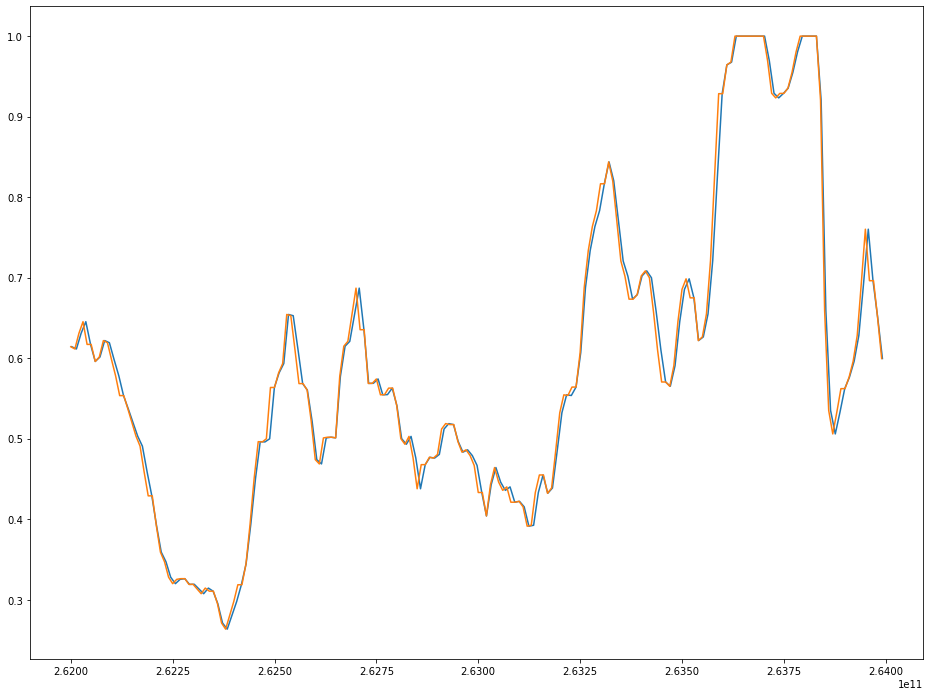

In [19]:
plt.figure(figsize=(16, 12))
plt.plot(music['00:04:22':'00:04:23']['C'])
plt.plot(musicr['00:04:22':'00:04:23']['C'])
plt.show()

In [20]:
musicr.reset_index(drop=True, inplace=True)

### Matching Times Between DataFrames
We need to match the musics and motion DataFrames together. We will create a 'time' column that repersents hundreths of seconds from the start of the motion capture. The music starts at 3 minutes or 18000 hundreths of a second

In [21]:
motion1['time(hs)'] = list(range(0,36001))
musicr['time(hs)'] = list(range(18000,35601))

In [22]:
motion1

,X,Y,Z,PID,time(hs)
0,159.596,1845.594,1732.156,1,0
1,159.583,1845.451,1732.144,1,1
2,159.584,1845.308,1732.126,1,2
3,159.587,1845.180,1732.105,1,3
4,159.597,1845.072,1732.103,1,4
...,...,...,...,...,...
35996,160.090,1837.312,1715.629,1,35996
35997,160.122,1837.488,1715.619,1,35997
35998,160.128,1837.653,1715.597,1,35998
35999,160.147,1837.829,1715.599,1,35999


In [23]:
#merge the motion and music data together on time column
par1 = musicr.merge(motion1, on='time(hs)', how='left')
par1.head()

,C,C_sharp,D,D_sharp,E,F,F_sharp,G,G_sharp,A,A_sharp,B,time(hs),X,Y,Z,PID
0,0.391866,0.271475,0.543743,0.414470,0.615711,0.905505,0.693868,1.0,0.873349,0.428765,0.196232,0.178688,18000,164.657,1864.265,1721.860,1
1,0.391006,0.270759,0.542460,0.419167,0.611465,0.895052,0.696120,1.0,0.865096,0.424725,0.202718,0.177431,18001,164.624,1864.225,1721.870,1
2,0.384290,0.269616,0.530845,0.424728,0.596871,0.879191,0.701280,1.0,0.854621,0.410783,0.205452,0.178596,18002,164.599,1864.181,1721.861,1
3,0.368410,0.266402,0.511752,0.433351,0.582881,0.878751,0.706602,1.0,0.850467,0.397394,0.211017,0.174648,18003,164.577,1864.140,1721.864,1
4,0.356740,0.260931,0.492235,0.435323,0.570510,0.877007,0.707534,1.0,0.849687,0.381047,0.214705,0.177209,18004,164.547,1864.106,1721.850,1


In [24]:
#We are goingt o only look at PID 1 currently so we can drop the column which acts as a constant currently
par1.drop(columns='PID', inplace=True)
par1.head()

,C,C_sharp,D,D_sharp,E,F,F_sharp,G,G_sharp,A,A_sharp,B,time(hs),X,Y,Z
0,0.391866,0.271475,0.543743,0.414470,0.615711,0.905505,0.693868,1.0,0.873349,0.428765,0.196232,0.178688,18000,164.657,1864.265,1721.860
1,0.391006,0.270759,0.542460,0.419167,0.611465,0.895052,0.696120,1.0,0.865096,0.424725,0.202718,0.177431,18001,164.624,1864.225,1721.870
2,0.384290,0.269616,0.530845,0.424728,0.596871,0.879191,0.701280,1.0,0.854621,0.410783,0.205452,0.178596,18002,164.599,1864.181,1721.861
3,0.368410,0.266402,0.511752,0.433351,0.582881,0.878751,0.706602,1.0,0.850467,0.397394,0.211017,0.174648,18003,164.577,1864.140,1721.864
4,0.356740,0.260931,0.492235,0.435323,0.570510,0.877007,0.707534,1.0,0.849687,0.381047,0.214705,0.177209,18004,164.547,1864.106,1721.850


In [25]:
#par1 = par1.merge(demos_clean, on='PID', how='left')
#par1

# Feature Creation
We are giong to create some additonal features from the note amplitudes including rolling averages, mins, maxs and rates of change

In [26]:
def note_features(note_column_df, note):
    feature_df = pd.DataFrame()
    feature_df[note + '_5sec_avg'] = note_column_df.rolling(500).mean()
    feature_df[note + '_2.5sec_avg'] = note_column_df.rolling(250).mean()
    feature_df[note + '_1sec_avg'] = note_column_df.rolling(100).mean()
    feature_df[note + '_10sec_max'] = note_column_df.rolling(500).max()
    feature_df[note + '_5sec_max'] = note_column_df.rolling(250).max()
    feature_df[note + '_1sec_max'] = note_column_df.rolling(100).max()
    feature_df[note + '_10sec_min'] = note_column_df.rolling(500).min()
    feature_df[note + '_5sec_min'] = note_column_df.rolling(250).min()
    feature_df[note + '_1sec_min'] = note_column_df.rolling(100).min()
    feature_df[note + '_10sec_diff'] = note_column_df.rolling(500).max() - note_column_df.rolling(250).min()
    feature_df[note + '_5sec_diff'] = note_column_df.rolling(250).max() - note_column_df.rolling(50).min()
    feature_df[note + '_1sec_diff'] = note_column_df.rolling(100).max() - note_column_df.rolling(100).min()
    return feature_df

In [27]:
musicr

,C,C_sharp,D,D_sharp,E,F,F_sharp,G,G_sharp,A,A_sharp,B,time(hs)
0,0.391866,0.271475,0.543743,0.414470,0.615711,0.905505,0.693868,1.000000,0.873349,0.428765,0.196232,0.178688,18000
1,0.391006,0.270759,0.542460,0.419167,0.611465,0.895052,0.696120,1.000000,0.865096,0.424725,0.202718,0.177431,18001
2,0.384290,0.269616,0.530845,0.424728,0.596871,0.879191,0.701280,1.000000,0.854621,0.410783,0.205452,0.178596,18002
3,0.368410,0.266402,0.511752,0.433351,0.582881,0.878751,0.706602,1.000000,0.850467,0.397394,0.211017,0.174648,18003
4,0.356740,0.260931,0.492235,0.435323,0.570510,0.877007,0.707534,1.000000,0.849687,0.381047,0.214705,0.177209,18004
...,...,...,...,...,...,...,...,...,...,...,...,...,...
17596,0.551258,0.239016,0.590822,0.848327,0.556109,0.694828,1.000000,0.846755,0.592610,0.795401,0.520809,0.609293,35596
17597,0.486828,0.255034,0.616595,0.832311,0.567619,0.685870,1.000000,0.849619,0.508727,0.755731,0.539000,0.600682,35597
17598,0.418250,0.280371,0.653649,0.814706,0.601733,0.692381,1.000000,0.866687,0.420425,0.728755,0.549097,0.572606,35598
17599,0.418250,0.280371,0.653649,0.814706,0.601733,0.692381,1.000000,0.866687,0.420425,0.728755,0.549097,0.572606,35599


In [28]:
nf = musicr.drop(columns=['time(hs)'])
for note in nf.columns:
    nf = nf.merge(note_features(musicr[note], note), left_index=True, right_index=True)

<Figure size 432x288 with 0 Axes>

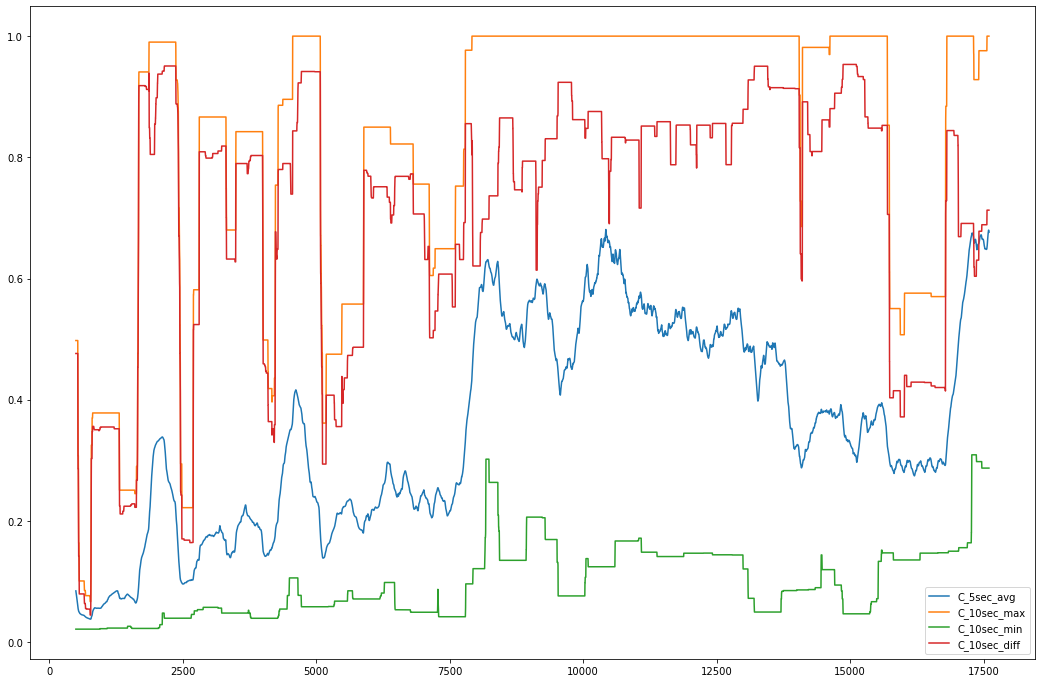

<Figure size 432x288 with 0 Axes>

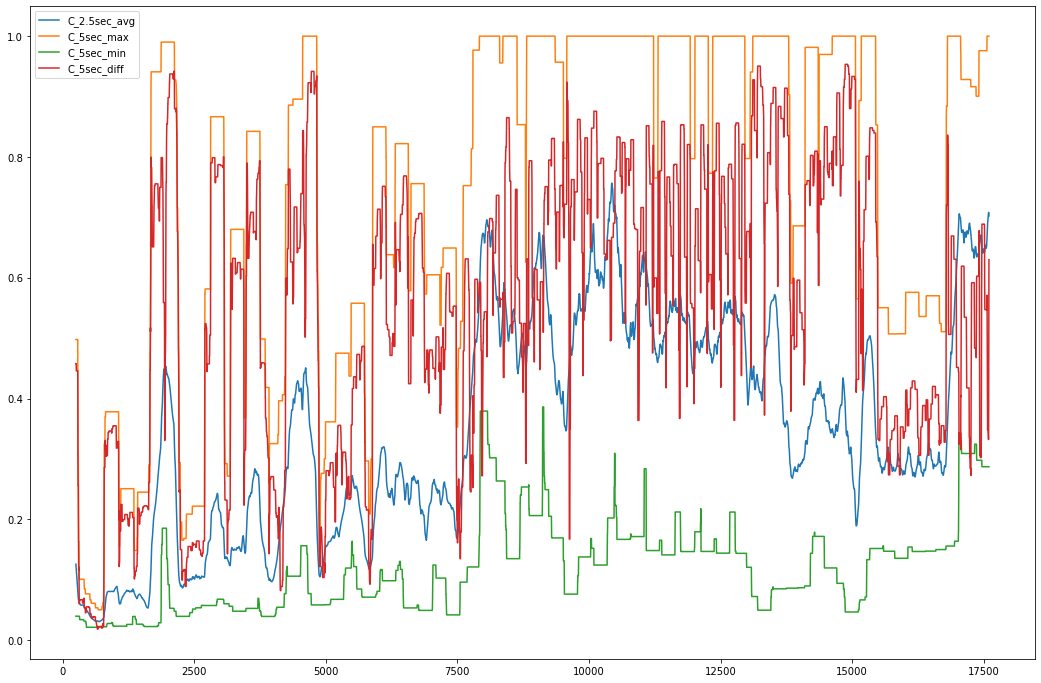

<Figure size 432x288 with 0 Axes>

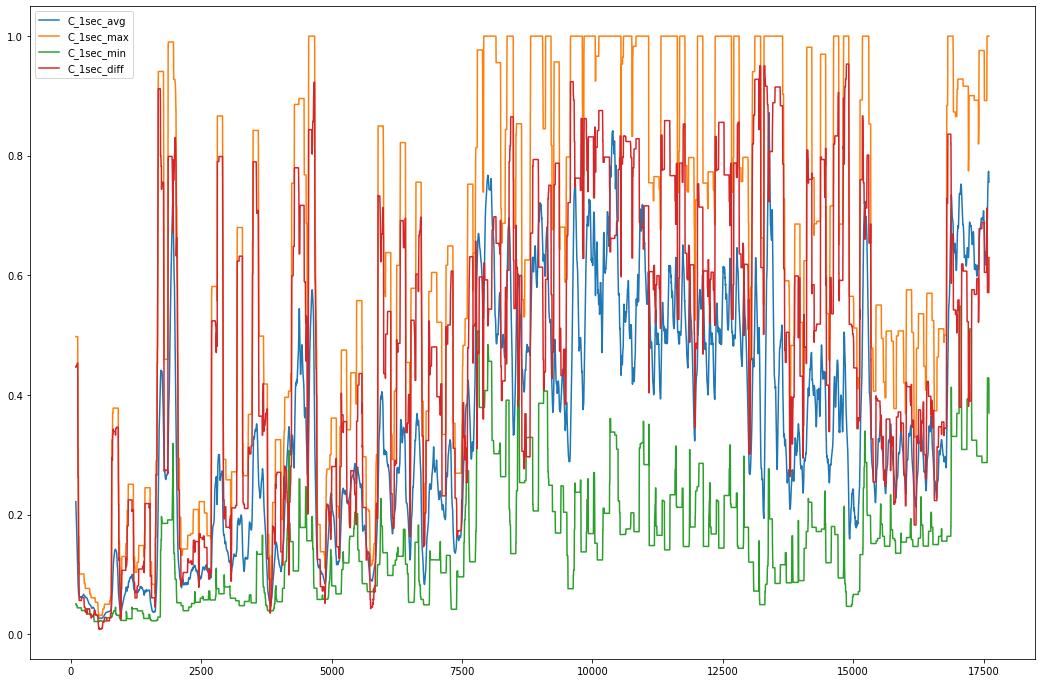

In [29]:
plt.figure()
nf.iloc[:,[12, 15, 18, 21]].plot(figsize=(18, 12))
plt.figure()
nf.iloc[:,[13, 16, 19, 22]].plot(figsize=(18, 12))
plt.figure()
nf.iloc[:,[14, 17 ,20, 23]].plot(figsize=(18, 12))
plt.show()

In [30]:
def motion_levels(XYZ, PID):
    feature_df = pd.DataFrame()
    feature_df[PID + '_X_disp1_avg'] = XYZ['X'].diff().rolling(100).mean()
    feature_df[PID + '_X_disp1_min'] = XYZ['X'].diff().rolling(100).min()
    feature_df[PID + '_X_disp1_max'] = XYZ['X'].diff().rolling(100).max()
    feature_df[PID + '_Y_disp1_avg'] = XYZ['Y'].diff().rolling(100).mean()
    feature_df[PID + '_Y_disp1_min'] = XYZ['Y'].diff().rolling(100).min()
    feature_df[PID + '_Y_disp1_max'] = XYZ['Y'].diff().rolling(100).max()
    feature_df[PID + '_Z_disp1_avg'] = XYZ['Z'].diff().rolling(100).mean()
    feature_df[PID + '_Z_disp1_min'] = XYZ['Z'].diff().rolling(100).min()
    feature_df[PID + '_Z_disp1_max'] = XYZ['Z'].diff().rolling(100).max()
    feature_df[PID + '_X_disp2_avg'] = XYZ['X'].diff().rolling(200).mean()
    feature_df[PID + '_Y_disp2_avg'] = XYZ['Y'].diff().rolling(200).mean()
    feature_df[PID + '_Z_disp2_avg'] = XYZ['Z'].diff().rolling(200).mean()
    return feature_df

In [31]:
motion_levels = motion_levels(motion1[['X', 'Y', 'Z']], '1')

In [32]:
X_levels = motion_levels.loc[:,motion_levels.columns.str.contains('X')]

In [33]:
motion_levels.head()

,1_X_disp1_avg,1_X_disp1_min,1_X_disp1_max,1_Y_disp1_avg,1_Y_disp1_min,1_Y_disp1_max,1_Z_disp1_avg,1_Z_disp1_min,1_Z_disp1_max,1_X_disp2_avg,1_Y_disp2_avg,1_Z_disp2_avg
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


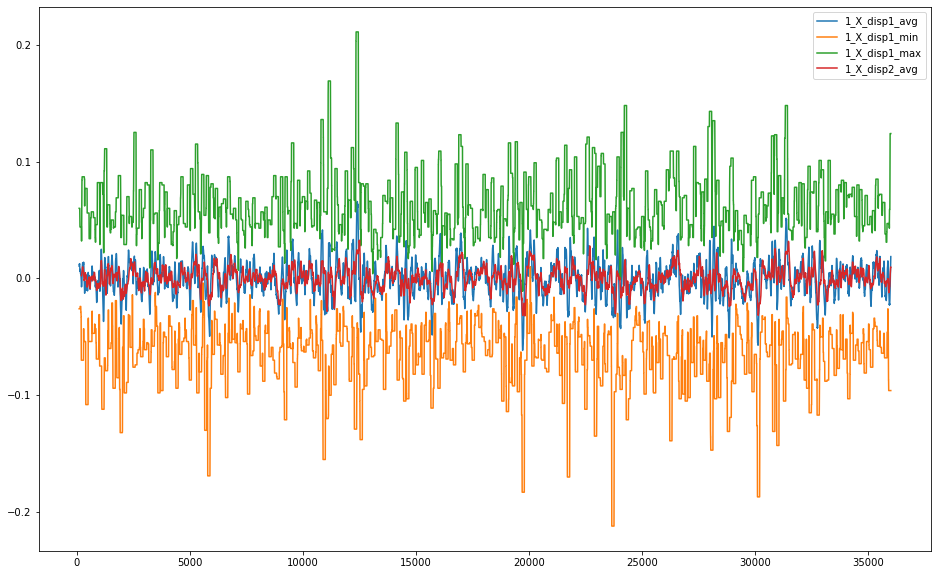

In [34]:
X_levels.plot(figsize=(16, 10))
plt.show()

In [35]:
model_data = nf.merge(motion_levels, left_index=True, right_index=True)
model_data.dropna(inplace=True)
model_data.shape

(17102, 168)

In [36]:
feather.write_feather(model_data, 'Model_data_Par1')

C:\ProgramData\Anaconda3\lib\site-packages\pyarrow\feather.py:83: FutureWarning: The SparseDataFrame class is removed from pandas. Accessing it from the top-level namespace will also be removed in the next version
  if isinstance(df, _pandas_api.pd.SparseDataFrame):


In [37]:
# segments[0]= data.iloc[0:18000]
#     segments[1]= data.iloc[18000:20000]
#     segments[2]= data.iloc[20000:21500]
#     segments[3]= data.iloc[21500:25500]
#     segments[4]= data.iloc[25500:27500]
#     segments[5]= data.iloc[27500:31000]
#     segments[6]= data.iloc[31000:33000]
#     segments[7]= data.iloc[33000:36000]